In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

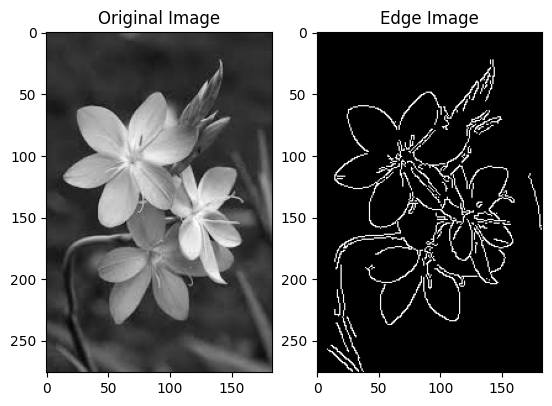

In [33]:
img = cv.imread('/content/drive/MyDrive/Trichy cllg sem 2 data/IVA Labs/2.flower.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

#Laplace of Gaussian (LoG) Edge Detection
 Laplacian operator with Gaussian smoothing:

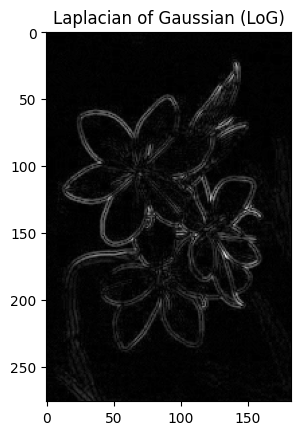

In [20]:
blurred_image = cv.GaussianBlur(img, (3, 3), 0)           # Gaussian blur
laplacian_edges = cv.Laplacian(blurred_image, cv.CV_64F)  # Laplacian operator
laplacian_edges = cv.convertScaleAbs(laplacian_edges)     # Convert back to uint8

plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.show()


#Gaussian + Laplacian + Thresholding

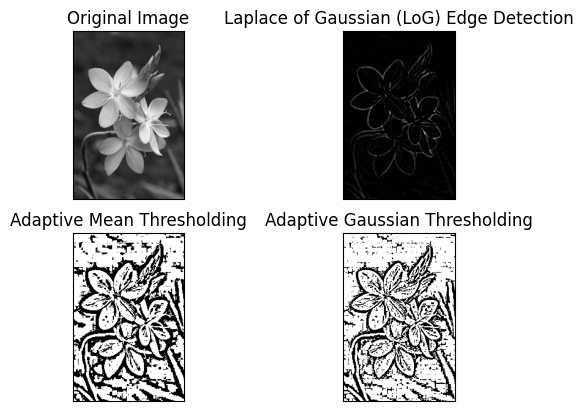

In [65]:
gaussian_kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6],[4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])
gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)
smoothed_image = cv.filter2D(img, -1, gaussian_kernel)

laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1],[0, 1, 0]])
laplacian_image = cv.filter2D(smoothed_image, -1, laplacian_kernel)
laplacian_image = np.abs(laplacian_image)    # image to absolute values --> Laplacian can result in negative val
laplacian_image = np.uint8(np.clip(laplacian_image, 0, 255))

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Laplace of Gaussian (LoG) Edge Detection','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, laplacian_image, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#Sobel Edge Detection

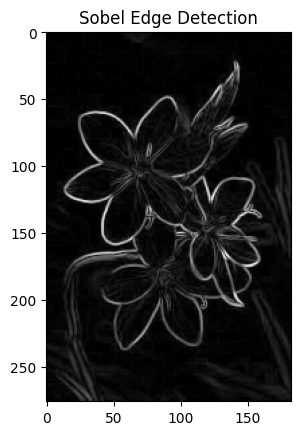

In [21]:
# Sobel edge detection (X and Y directions)
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobel_edges = cv.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()


#Prewitt Edge Detection Code:
1. uses two 3x3 convolution kernels to compute the gradients in the horizontal and vertical directions.
2. By detecting changes in intensity in the horizontal and vertical directions, it highlights edges in an image.

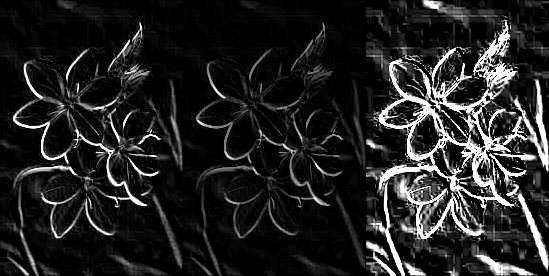

In [55]:
prewitt_kernel_x = np.array([[-1, 0, 1],[-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0],  [-1, -1, -1]], dtype=np.float32)

grad_x = cv.filter2D(img, -1, prewitt_kernel_x)  # Gradient in  X direction
grad_y = cv.filter2D(img, -1, prewitt_kernel_y)  # Gradient in Y direction
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

# alpha values--> 0.5 , 1 ,5  --> alpha – weight of array elements.
grad = cv.addWeighted(abs_grad_x, 1, abs_grad_y, 1, 0)
grad1 = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad2 = cv.addWeighted(abs_grad_x, 5, abs_grad_y, 5, 0)

res = np.hstack((grad,grad1,grad2))
cv2_imshow(res)

